step 1: import modules.

In [5]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

step 2: create csv file and let it be filled with data from main.py

In [6]:
#with open('dataset.csv', 'w', newline='') as file:
    #writer = csv.writer(file)
    #writer.writerow(["y cord", "ray Left", "ray Mid Left", "ray Forward", "ray Mid Right", "ray Right", "left", "right"])

step 3: check data

In [7]:
data = pd.read_csv('dataset.csv')
data.head()

,y cord,ray Left,ray Mid Left,ray Forward,ray Mid Right,ray Right,left,right
0,-165,300,300,300,300,300,0,0
1,-165,300,300,300,300,300,0,0
2,-165,300,300,300,300,300,0,0
3,-168,300,300,300,300,300,0,0
4,-172,300,300,300,300,300,0,0


step 4: create variables like train and validantion.

In [8]:
X = data.drop(columns=['left', 'right'])
y = pd.concat([data['left'], data['right']], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

y_train.head()

,left,right
5034,0,0
1830,0,0
327,0,0
4178,0,0
4668,0,0


step 5: Create the model.

In [9]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0,2),                    # dropout rate 0.2 is best with: ~0.9717, 0.3 is: ~0,0019 lower, 0.4 is: ~0,0016 lower and 0.1 is: ~0,0021
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),            # without layers: ~0,9702
    layers.Dropout(0,2),                    # with 256 layers: ~0.9716 
    layers.Dense(256, activation="relu"),   # with 512 layers: ~0.9698
    layers.BatchNormalization(),
    layers.Dropout(0,2),
    layers.Dense(2, activation="sigmoid") # sigmoid works better than relu ~0.04 difrence
])

step 6: compile and create early stopping function.

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

step 7: fit model (possibly also make a model history for graphs).

In [11]:
model_history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=512, epochs=200, callbacks=[early_stopping])

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - binary_accuracy: 0.5640 - loss: 0.8716 - val_binary_accuracy: 0.8792 - val_loss: 0.4657
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8442 - loss: 0.5542 - val_binary_accuracy: 0.8852 - val_loss: 0.4867
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9012 - loss: 0.4752 - val_binary_accuracy: 0.9377 - val_loss: 0.4462
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9220 - loss: 0.4147 - val_binary_accuracy: 0.9380 - val_loss: 0.4176
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9334 - loss: 0.3557 - val_binary_accuracy: 0.9380 - val_loss: 0.3873
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9437 - loss: 0.3115 - val_binary_accuracy: 0.9380 - val_loss: 0.3528
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9478 - loss: 0.2814 - val_binary_accuracy: 0.9380 - val_loss: 0.3014
Epoch 8/2

step 8: copy paste graph stuff

<Axes: title={'center': 'Accuracy'}>

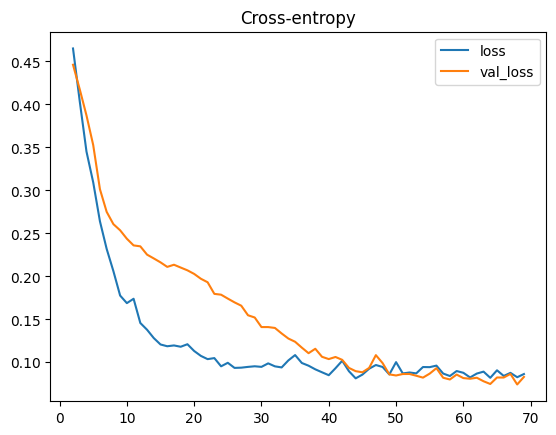

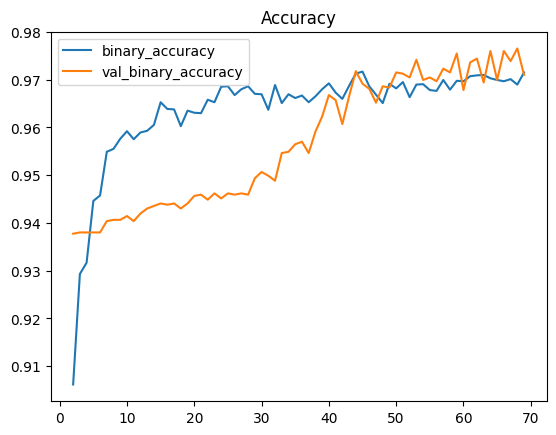

In [12]:
history_df = pd.DataFrame(model_history.history)
history_df.loc[2:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[2:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [36]:
import numpy as np

question = pd.DataFrame({'question1': [250,300,300,300,300,300]})
question_array = question['question1'].to_numpy().reshape(1, -1)

predictions = model.predict(question_array)
binary_predictions = (predictions > 0.5).astype(int)
print(binary_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0 0]]
